In [3]:
import pickle
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# Fig 2-1

In [35]:
N = 4                             # No. of agents
alpha = 0.5
T = 10
ENS_step = 1000                    # Ensemble
MC_step = 100                     # (Macro) Step

T_lst = [5,10,15,20,25,30]

In [36]:
SH_avg = []; SH_std = []
SHV_avg = []; SHV_std = []
config = 'SH'
for T in T_lst:
  with open(f"Sarray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  SH_avg.append(lst[-1, :, :,2].mean(1).mean())
  SH_std.append(np.std(lst[-1, :, :,2].mean(1))/(ENS_step**0.5))

  with open(f"Varray_N{N}_T{T}_alpha{alpha}_{config}.pkl","rb") as f:
    lst = pickle.load(f)
  SHV_avg.append(lst[-1, :].mean())
  SHV_std.append(np.std(lst[-1, :])/(ENS_step**0.5))

In [37]:
SH_avg = np.array(SH_avg)
SH_std = np.array(SH_std)

SHV_avg = np.array(SHV_avg)
SHV_std = np.array(SHV_std)

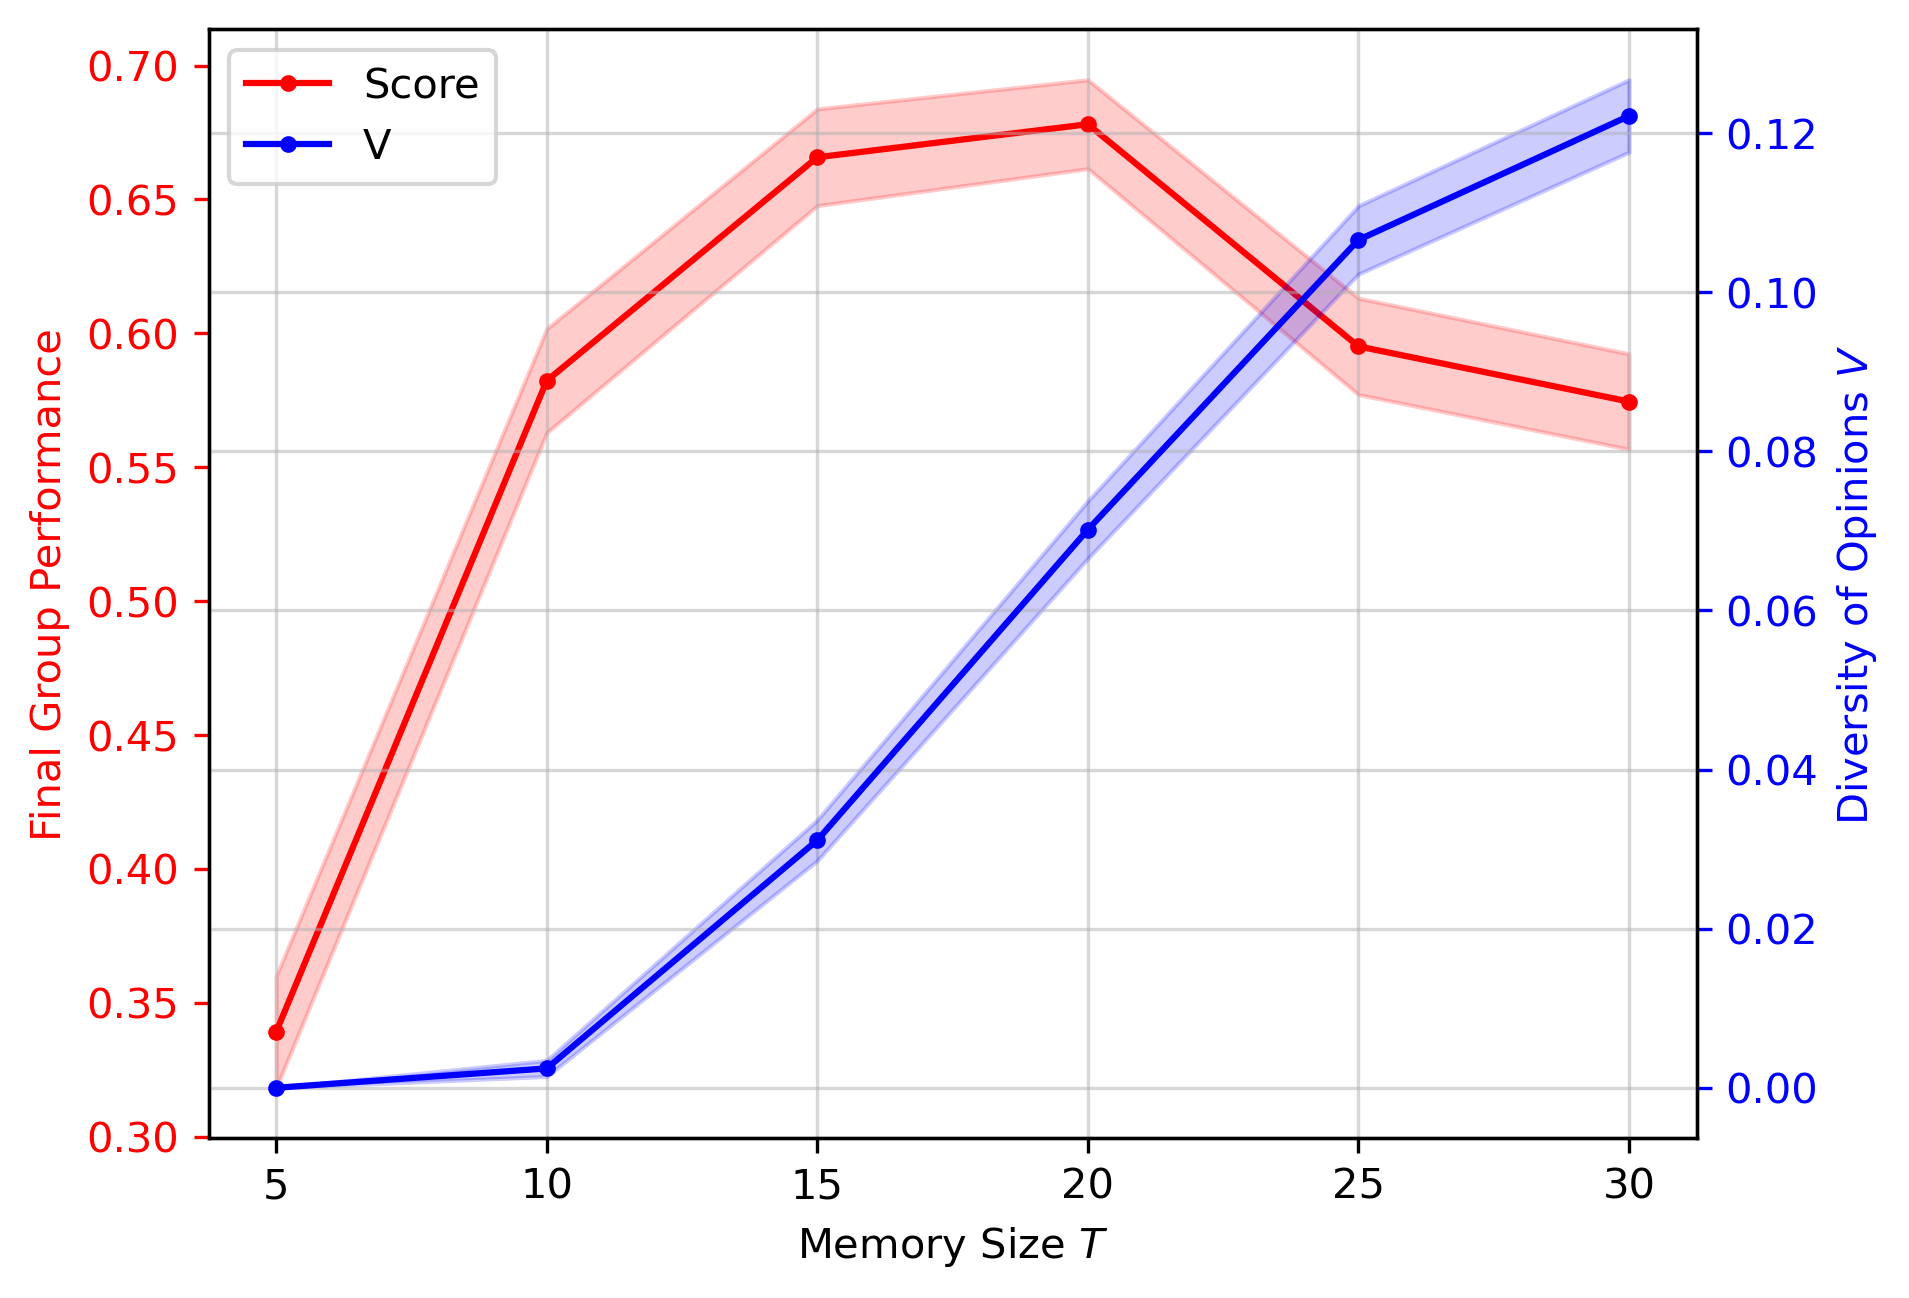

In [105]:
fig, ax1 = plt.subplots(dpi=300)

line1 = ax1.plot(T_lst, SH_avg, marker='.', color='red', label='Score')
ax1.fill_between(T_lst, SH_avg - SH_std, SH_avg + SH_std, color='red', alpha = 0.2)
ax1.set_xlabel(r'Memory Size $T$')
ax1.set_ylabel('Final Group Performance', color='red')
ax1.tick_params(axis="y", colors="red")

ax2 = ax1.twinx()


line2 = ax2.plot(T_lst, SHV_avg, marker='.', color='blue', label='V')
ax2.fill_between(T_lst, SHV_avg - SHV_std, SHV_avg + SHV_std, color='blue', alpha = 0.2)
ax2.set_ylabel(r'Diversity of Opinions $V$', color='blue')
ax2.tick_params(axis="y", colors="blue")

ax1.grid(True, axis='x', alpha=0.5)
ax2.grid(alpha=0.5)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left')


plt.show()

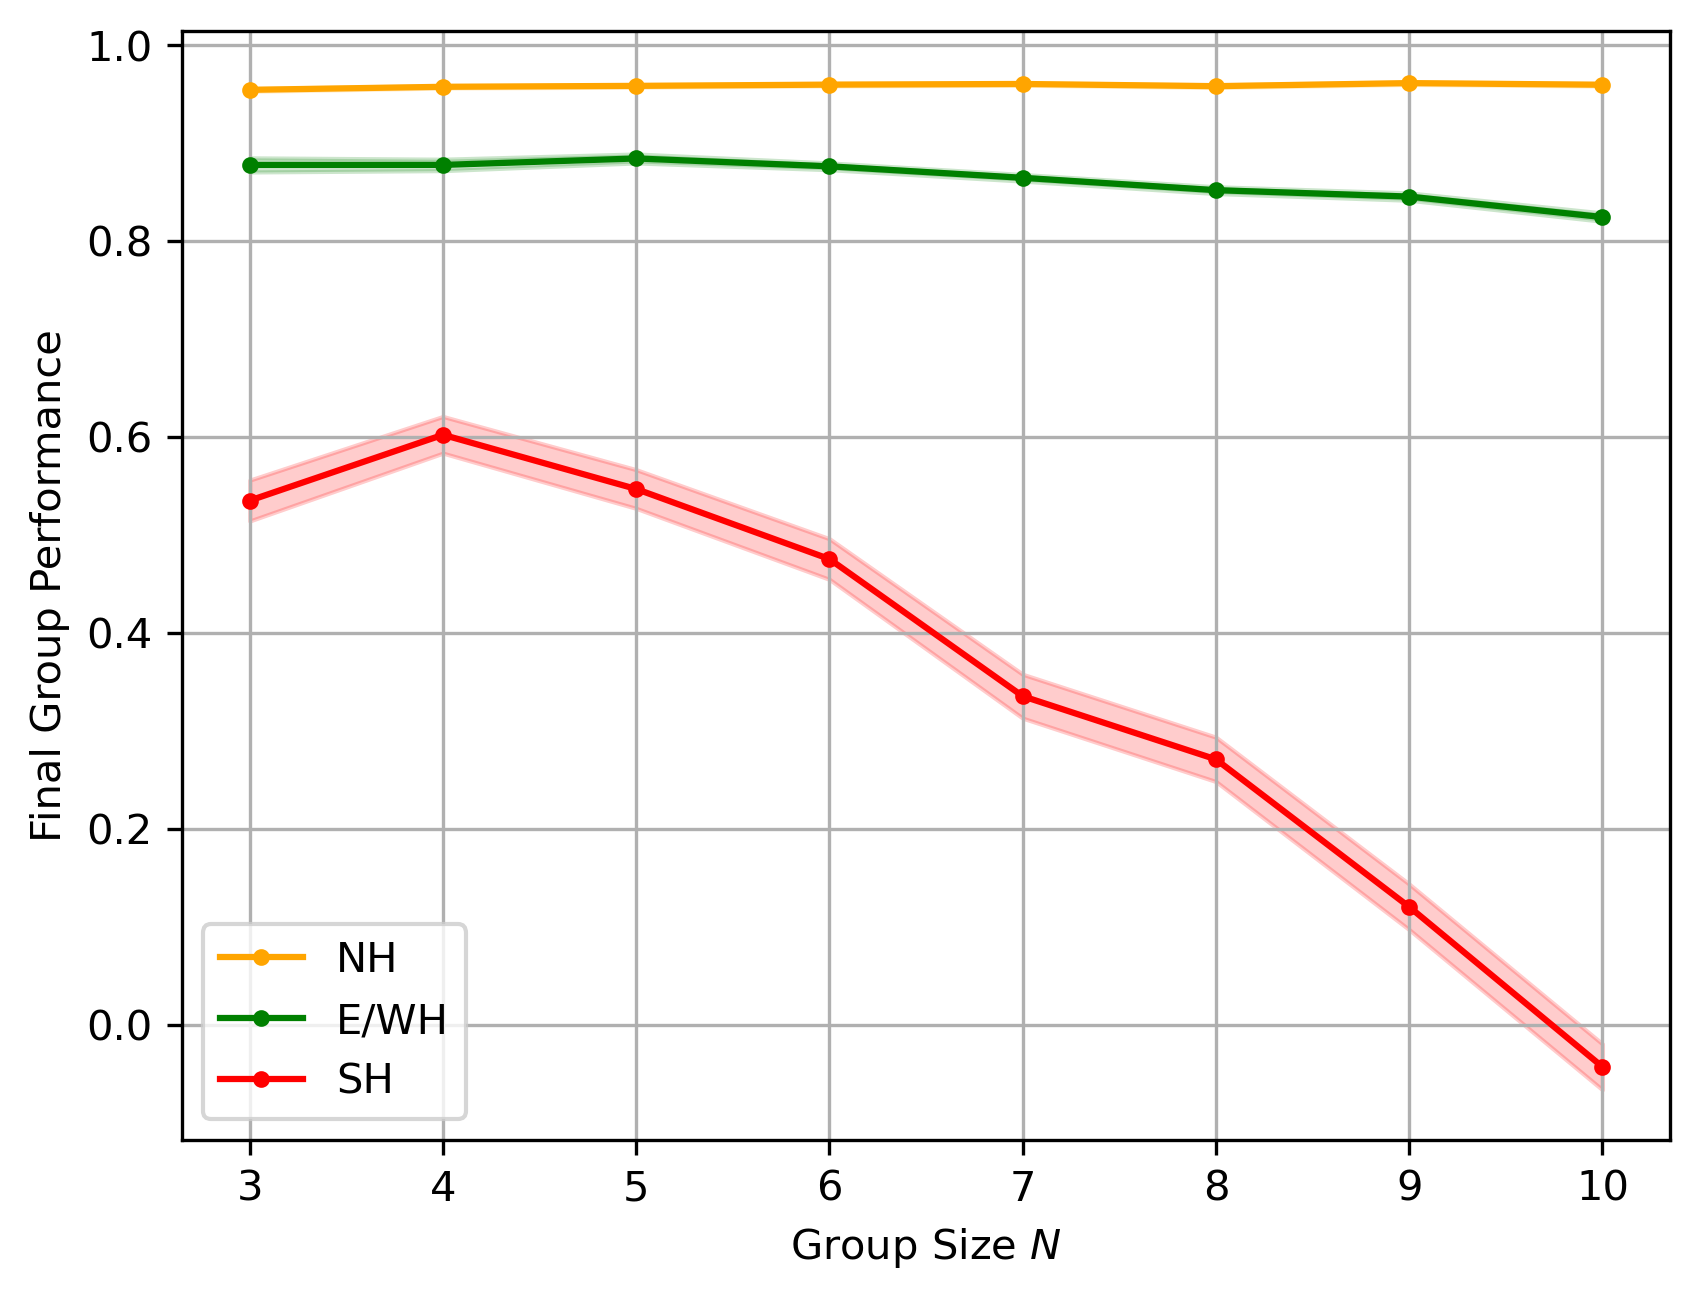

In [13]:
plt.figure(dpi=300)

plt.plot(T_lst, SH_avg, color='red', marker='.', label='SH')
plt.fill_between(T_lst, SH_avg - SH_std, SH_avg + SH_std, color='red', alpha = 0.2)

plt.plot(T_lst, SH_avg, color='black', marker='.', label='SH')
plt.fill_between(T_lst, SHV_avg - SHV_std, SHV_avg + SHV_std, color='black', alpha = 0.2)

plt.xlabel(r'Group Size $N$')
plt.ylabel('Final Group Performance')

plt.legend()
plt.grid()